In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
#15, 6

In [19]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y %H:%M:%S ')
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                                     node  data_hsdpa  hsdpa_users  thp_hsdpa  \
date                                                                            
2016-09-12 00:00:00  DF-BRASILIA-LAGO_SUL        5.04       153.04    1045.97   
2016-09-12 00:30:00  DF-BRASILIA-LAGO_SUL        3.70       124.60    1119.00   
2016-09-12 01:00:00  DF-BRASILIA-LAGO_SUL        3.76        94.13    1266.90   
2016-09-12 01:30:00  DF-BRASILIA-LAGO_SUL        2.45        73.26     965.57   
2016-09-12 02:00:00  DF-BRASILIA-LAGO_SUL        1.69        58.82     927.78   

                     data_hsdpa_norm  Unnamed: 6  Unnamed: 7  
date                                                          
2016-09-12 00:00:00        -0.185609         NaN         NaN  
2016-09-12 00:30:00        -0.272116         NaN         NaN  
2016-09-12 01:00:00        -0.268243         NaN         NaN  
2016-09-12 01:30:00        -0.352813         NaN         NaN  
2016-09-12 02:00:00        -0.401877         NaN      

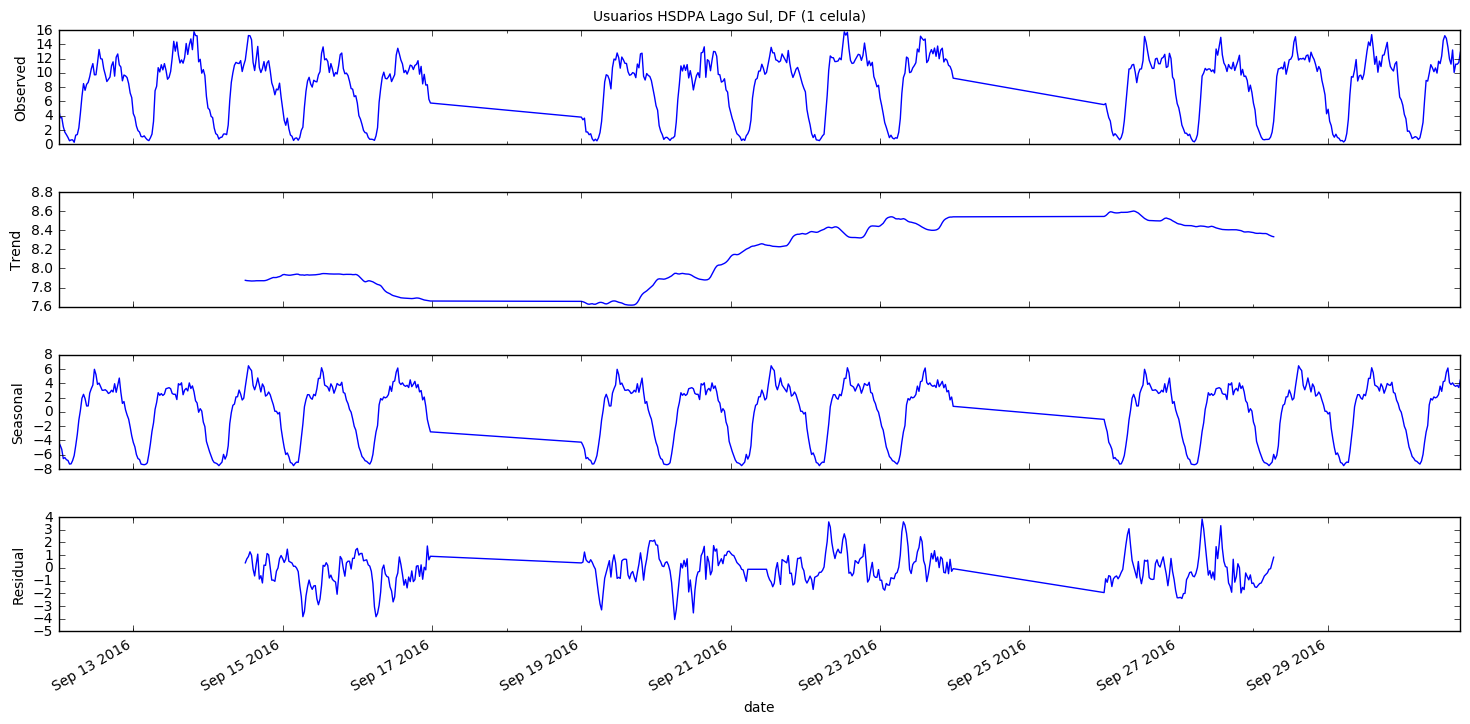

In [22]:

decomposition = sm.tsa.seasonal_decompose(data.data_hsdpa,freq=240)


fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
fig.suptitle('Usuarios HSDPA Lago Sul, DF (1 celula)')

In [11]:
ts = data['data_hsdpa']
ts = (ts - ts.min()) / (ts.max() - ts.min())
ts.plot(use_index=False)

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=48)
    rolstd = pd.rolling_std(timeseries, window=48)

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original',use_index=False)
    mean = rolmean.plot(color='red', label='Rolling Mean',use_index=False)
    std = rolstd.plot(color='black', label = 'Rolling Std',use_index=False)    
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=False).std()


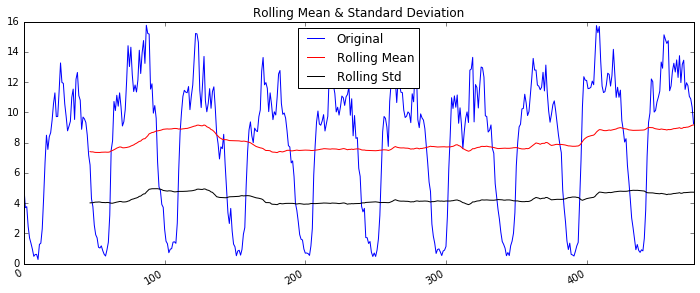

Results of Dickey-Fuller Test:
Test Statistic                -6.358580e+00
p-value                        2.507032e-08
#Lags Used                     1.400000e+01
Number of Observations Used    4.620000e+02
Critical Value (5%)           -2.867816e+00
Critical Value (1%)           -3.444584e+00
Critical Value (10%)          -2.570113e+00
dtype: float64


In [17]:
test_stationarity(ts)

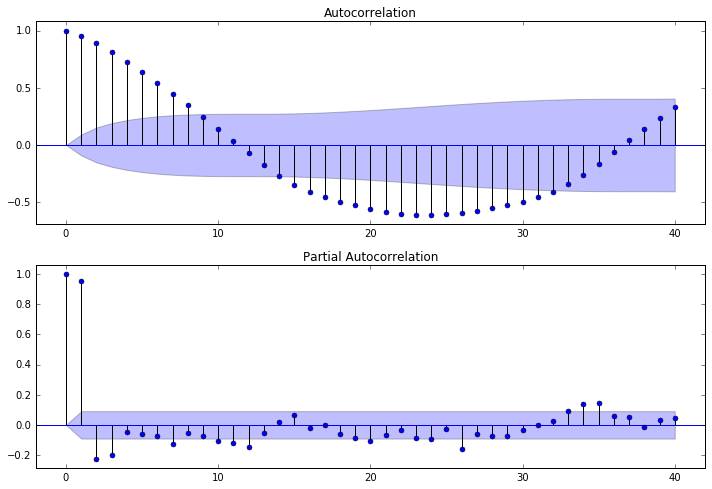

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts.iloc[13:], lags=40, ax=ax2)

In [22]:
mod = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(2,0,1), seasonal_order=(2,0,1,48))
results = mod.fit()
print results.summary()

AttributeError: 'module' object has no attribute 'statespace'

In [24]:
#from statsmodels.tsa.x13 import x13_arima_select_order
#res = x13_arima_select_order(ts)
import statsmodels.tsa.statespace

ImportError: No module named statespace